### 필요한 라이브러리 불러오기

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Kaggle Survey 데이터 불러오기 

In [8]:
# data = pd.read_csv("data/kaggle_survey_2020_responses.csv", header=1)
data = pd.read_csv("data/kaggle_survey_2020_responses.csv")

C:\Users\user\AppData\Local\Temp\ipykernel_588\3833044253.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("data/kaggle_survey_2020_responses.csv")


### 데이터 전처리

- 교육상태와 관련이 있는 column들을 고릅니다.

- Data Science 실무 경력과 관련된 column들을 고릅니다.

In [9]:
# edu_column 
edu_columns = ["Q4", "Q6", "Q15"]

# ds_column
ds_columns = ["Q5", "Q20", "Q22"]
y = ["Q24"]
# 회귀분석을 이용하여 edu_columns와 ds_columns이 연봉(Q24)가 무슨 연관이 있는지 추가 조사 해보기

edit_data = data[edu_columns + ds_columns + y]
edit_data


,Q4,Q6,Q15,Q5,Q20,Q22,Q24
0,What is the highest level of formal education ...,For how many years have you been writing code ...,For how many years have you used machine learn...,Select the title most similar to your current ...,What is the size of the company where you are ...,Does your current employer incorporate machine...,What is your current yearly compensation (appr...
1,Doctoral degree,5-10 years,1-2 years,Student,NaN,NaN,NaN
2,Master’s degree,5-10 years,1-2 years,Data Engineer,"10,000 or more employees","We have well established ML methods (i.e., mod...","100,000-124,999"
3,Bachelor’s degree,10-20 years,I do not use machine learning methods,Software Engineer,"1000-9,999 employees",No (we do not use ML methods),"15,000-19,999"
4,Master’s degree,5-10 years,3-4 years,Data Scientist,250-999 employees,"We have well established ML methods (i.e., mod...","125,000-149,999"
...,...,...,...,...,...,...,...
20032,Some college/university study without earning ...,NaN,NaN,NaN,NaN,NaN,NaN
20033,Master’s degree,20+ years,1-2 years,Currently not employed,NaN,NaN,NaN
20034,Master’s degree,< 1 years,I do not use machine learning methods,Research Scientist,0-49 employees,We are exploring ML methods (and may one day p...,$0-999
20035,Bachelor’s degree,3-5 years,1-2 years,Software Engineer,"10,000 or more employees","We recently started using ML methods (i.e., mo...",$0-999


In [10]:
# null이 아닌 row만
edit_data[edit_data.isnull().any(axis=1)]

,Q4,Q6,Q15,Q5,Q20,Q22,Q24
1,Doctoral degree,5-10 years,1-2 years,Student,NaN,NaN,NaN
5,Master’s degree,3-5 years,NaN,Software Engineer,NaN,NaN,NaN
6,Bachelor’s degree,< 1 years,NaN,Data Analyst,NaN,NaN,NaN
7,Bachelor’s degree,3-5 years,Under 1 year,Student,NaN,NaN,NaN
8,Master’s degree,< 1 years,1-2 years,Student,NaN,NaN,NaN
...,...,...,...,...,...,...,...
20028,Master’s degree,3-5 years,I do not use machine learning methods,Student,NaN,NaN,NaN
20029,Master’s degree,< 1 years,I do not use machine learning methods,Data Analyst,0-49 employees,NaN,NaN
20031,Master’s degree,NaN,NaN,NaN,NaN,NaN,NaN
20032,Some college/university study without earning ...,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# 결측치 제거
final_data = edit_data.dropna()


## 교육수준과 관련된 EDA

- EDA에서는 다음과 같은 항목을 살펴봅니다.

> 기본적인 빈도 분석

> 히스토그램

> Pie chart와 같은 plotting 기법들

### Q4 column

**"What is the highest level of formal education that you have attained or plan to attain with the next 2 years?"**

- 기본적인 matplotlib(pyplot)을 이용하여 시각화를 해봅니다.

In [12]:
Q4 = final_data["Q4"][1:]
Q4

2               Master’s degree
3             Bachelor’s degree
4               Master’s degree
9               Doctoral degree
12              Doctoral degree
                  ...          
20025    I prefer not to answer
20030         Bachelor’s degree
20034           Master’s degree
20035         Bachelor’s degree
20036           Master’s degree
Name: Q4, Length: 10168, dtype: object

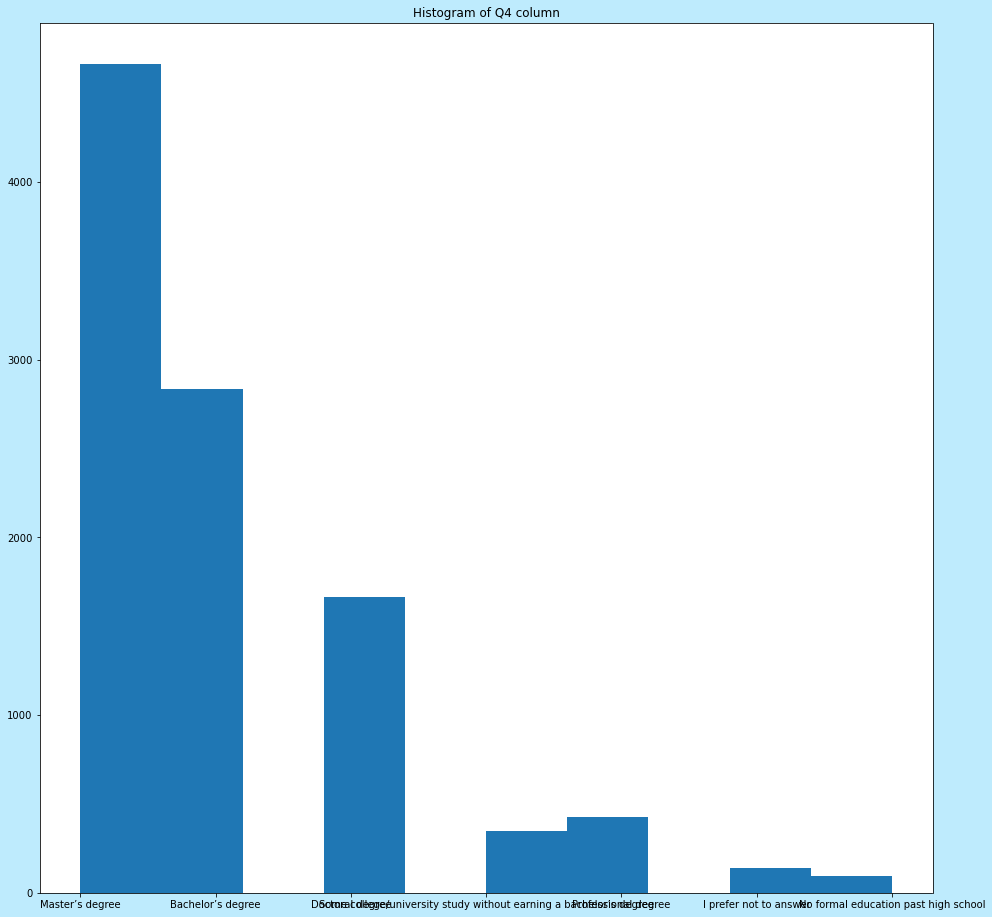

In [13]:
# plt.hist
plt.figure(figsize=(16, 16), facecolor='#BEEBFD')
plt.title("Histogram of Q4 column")
plt.hist(Q4)

plt.show()

Text(0.5, 1.0, 'Pie chart for Q4 column')

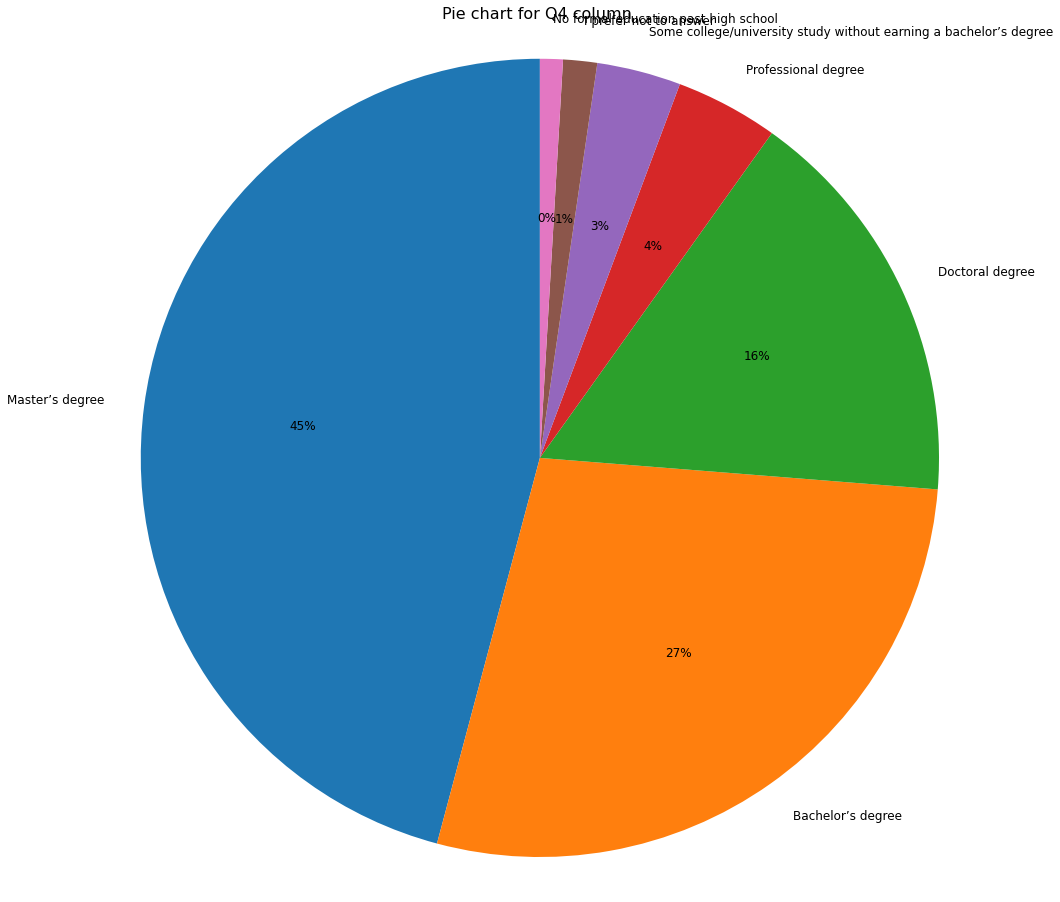

In [14]:
plt.figure(figsize=(16, 16))
plt.pie(Q4.value_counts(),
       labels=Q4.value_counts().index,
       autopct='%d%%',
       startangle=90,
       textprops={'fontsize':12})
plt.axis('equal')
plt.title("Pie chart for Q4 column", fontsize=16)

### Q6 column 
**For how many years have you been writing code and/or programming?**

In [15]:
Q6 = final_data["Q6"][1:]

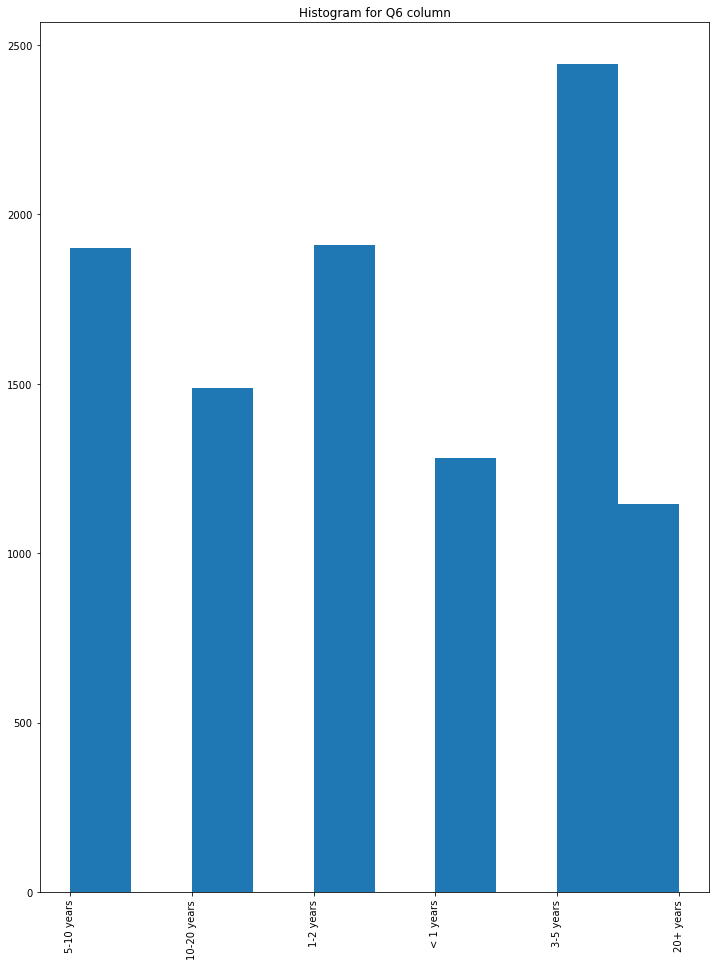

In [16]:
plt.figure(figsize=(12, 16))
# plt.hist
plt.hist(Q6)
plt.xticks(rotation='vertical')
plt.title("Histogram for Q6 column")
plt.show()

Text(0.5, 1.0, 'Pie chart for Q6 column')

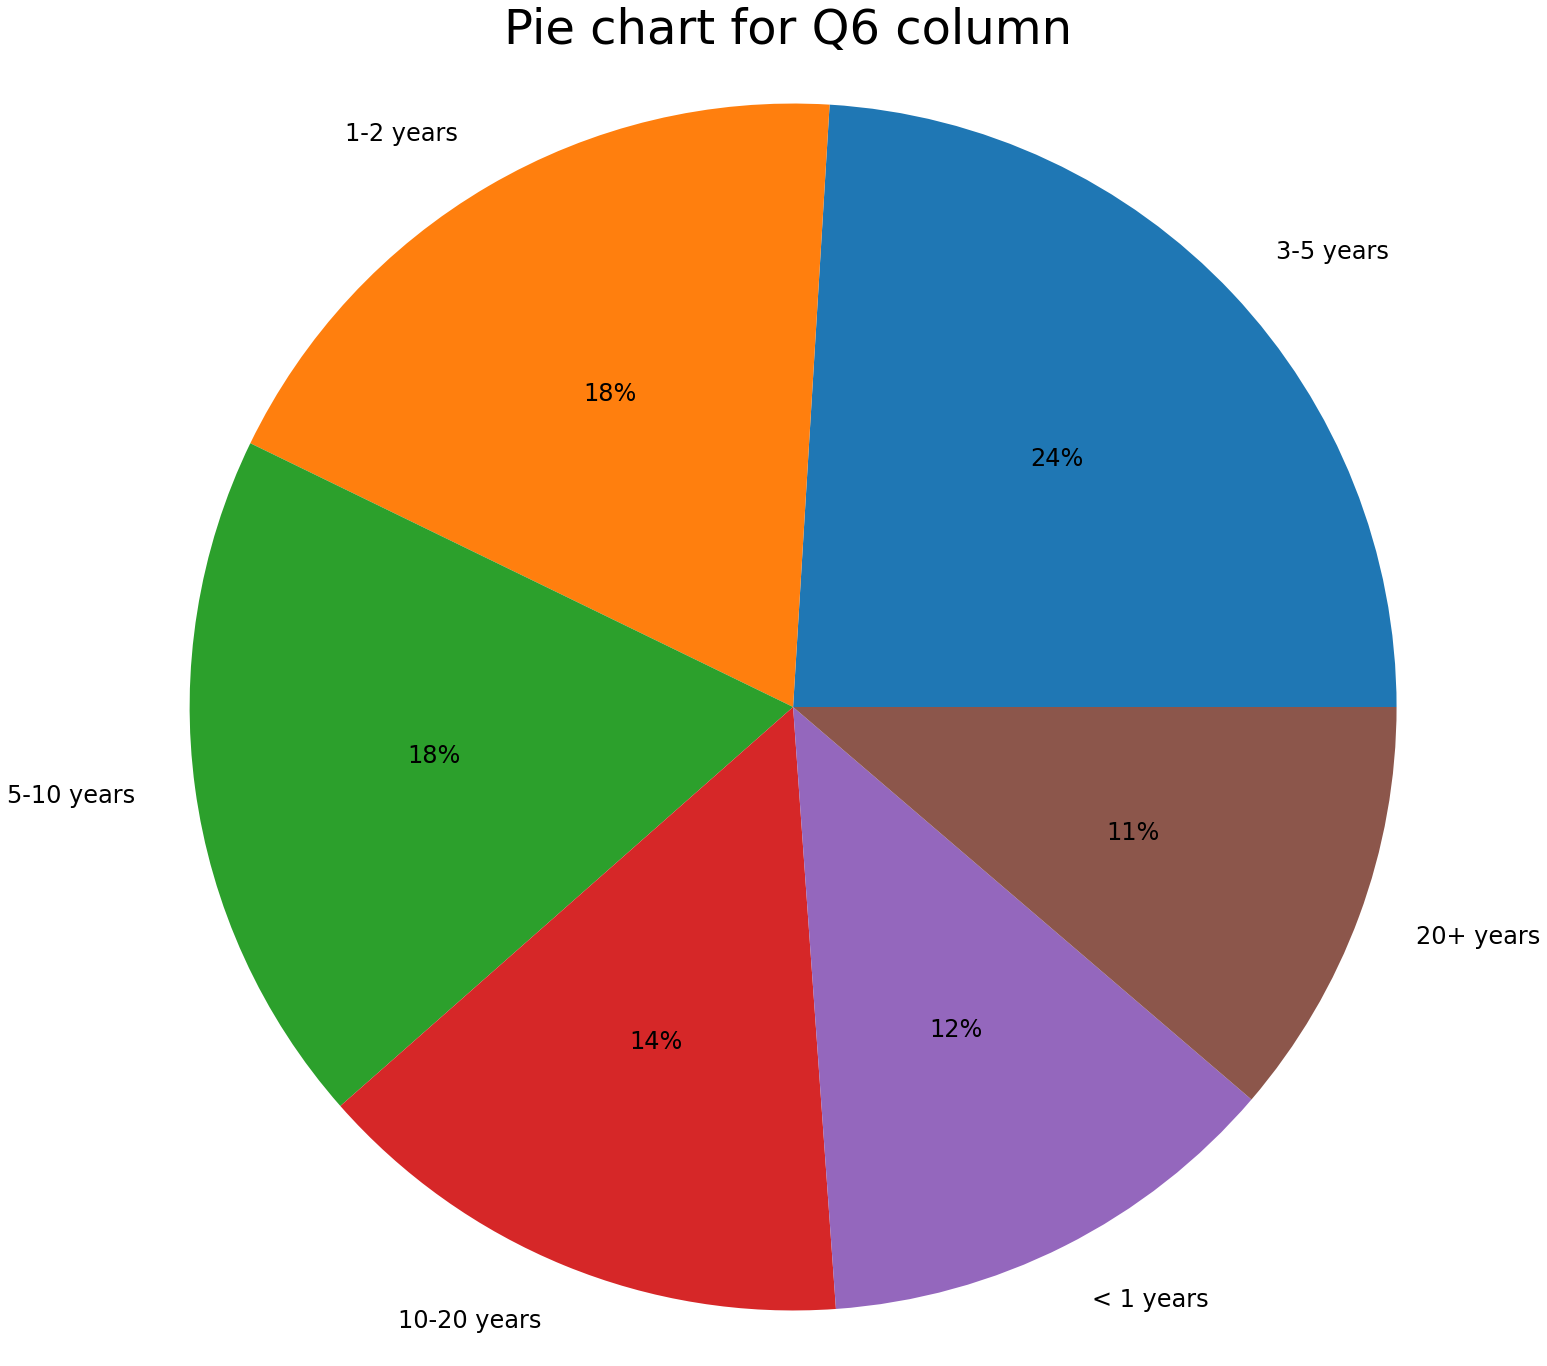

In [17]:
plt.figure(figsize=(24, 24))
plt.pie(Q6.value_counts(),
       labels=Q6.value_counts().index,
       autopct='%d%%',
       textprops={'fontsize':24})
plt.axis('equal')
plt.title("Pie chart for Q6 column", fontsize=48)

### Q15 column

**For how many years have you used machine learning methods?**

- seaborn을 이용해서 시각화를 해봅니다.

In [18]:
Q15 = final_data["Q15"][1:]

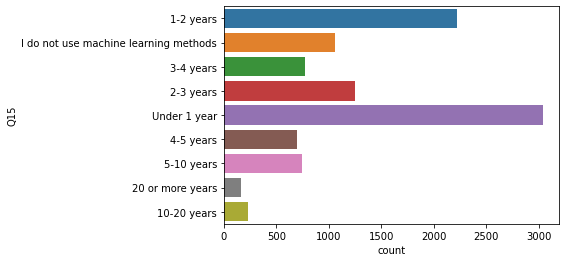

In [19]:
# countplot을 사용해봅니다
sns.countplot(y="Q15", data=final_data[1:])
plt.show()

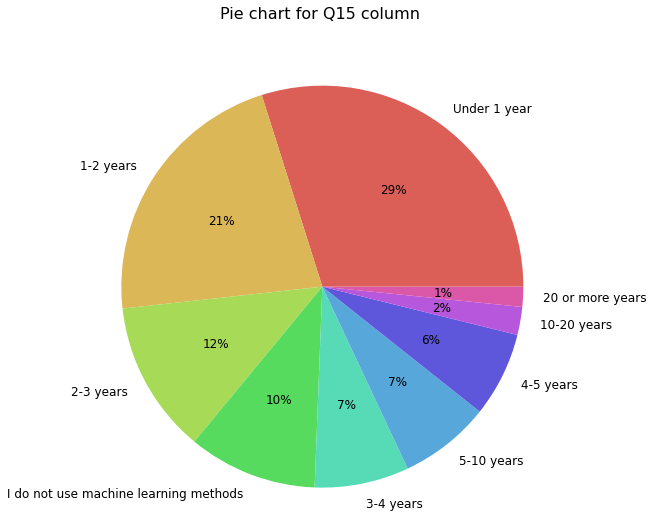

In [20]:
plt.figure(figsize=(8,8))
plt.pie(Q15.value_counts(),
       labels=Q15.value_counts().index,
       autopct='%d%%',
        colors=sns.color_palette('hls',len(Q15.value_counts().index)),
       textprops={'fontsize':12})
plt.axis('equal')
plt.title("Pie chart for Q15 column", fontsize=16, pad=50)
plt.show()

## 직업과 관련된 EDA

- EDA에서는 다음과 같은 항목을 살펴봅니다.

> 기본적인 빈도 분석

> 히스토그램

> Pie chart와 같은 plotting 기법들

### Q5 column

**Select the title most similar to your current role**

- 기본적인 matplotlib(pyplot)을 이용하여 시각화를 해봅니다.

In [21]:
Q5 = final_data["Q5"][1:]

In [22]:
Q5.value_counts()

Data Scientist               2369
Software Engineer            1597
Other                        1320
Data Analyst                 1180
Research Scientist            987
Machine Learning Engineer     900
Business Analyst              590
Product/Project Manager       525
Data Engineer                 361
Statistician                  231
DBA/Database Engineer         108
Name: Q5, dtype: int64

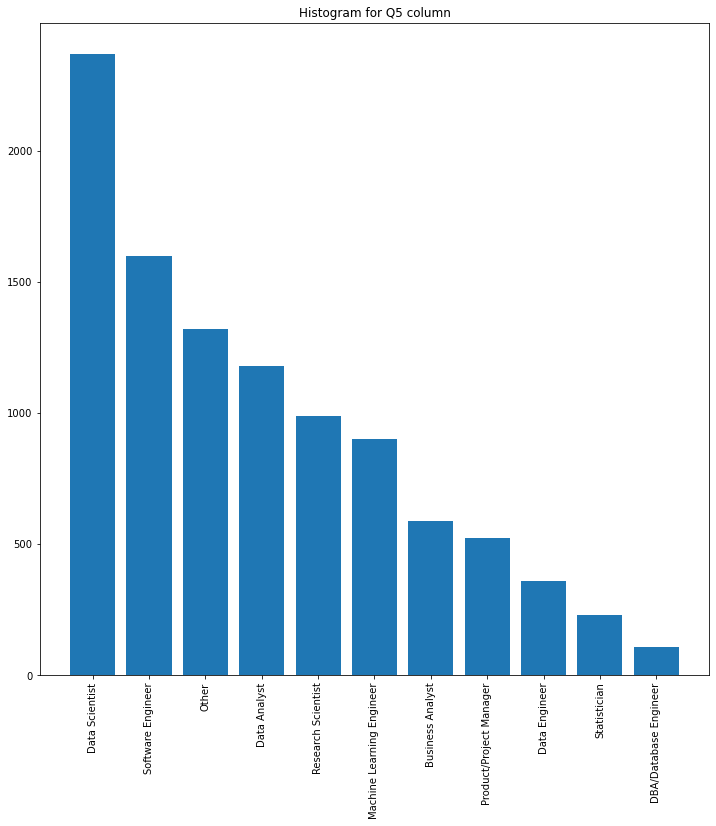

In [23]:
plt.figure(figsize=(12, 12))
# plt.hist(Q5)
plt.bar(Q5.value_counts().index, Q5.value_counts().values)
plt.xticks(rotation='vertical')
plt.title("Histogram for Q5 column")
plt.show()

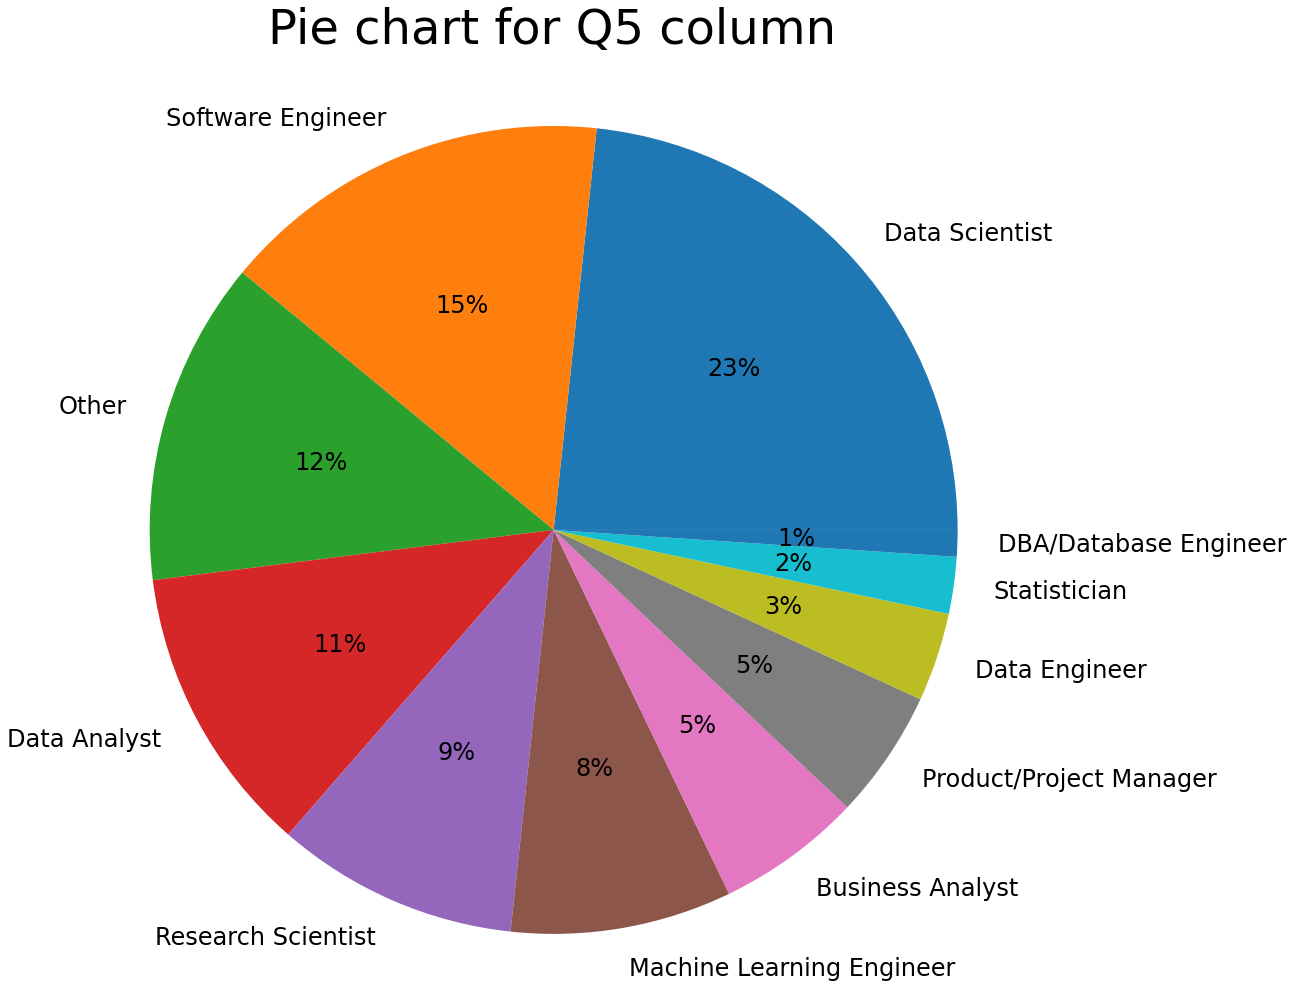

In [24]:
plt.figure(figsize=(16, 16))
plt.pie(Q5.value_counts(),
       labels=Q5.value_counts().index,
       autopct='%d%%',
       textprops={'fontsize':24})
plt.axis('equal')
plt.title("Pie chart for Q5 column", fontsize=48, pad=50)
plt.show()

### Q20 column

**What is the size of the compnay where are employed?**
- seaborn을 이용해서 시각화를 해봅니다.

In [25]:
Q20 = final_data["Q20"][1:]
Q20.value_counts()

0-49 employees              3642
10,000 or more employees    2016
1000-9,999 employees        1757
50-249 employees            1515
250-999 employees           1238
Name: Q20, dtype: int64

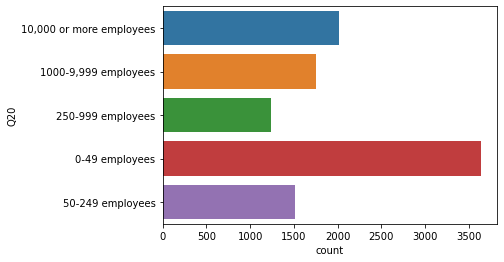

In [26]:
# sns.countplot을 사용해봅시다.
sns.countplot(data= final_data[1:], y="Q20")
plt.show()

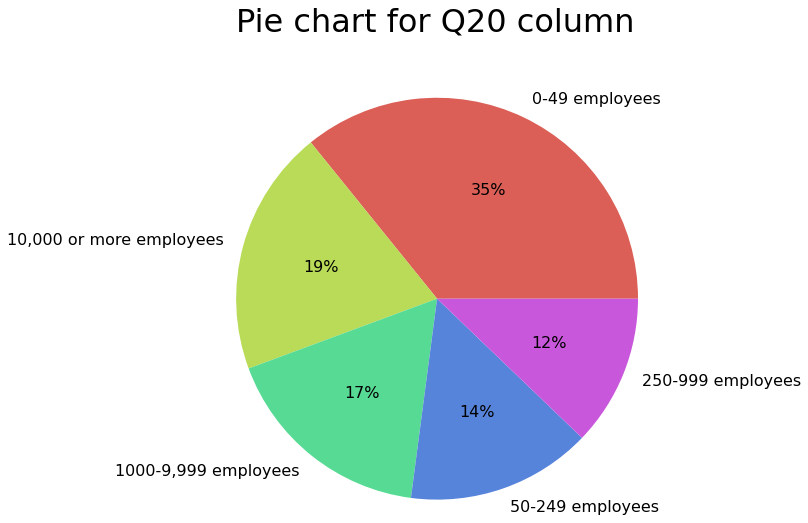

In [27]:
plt.figure(figsize=(8,8))
plt.pie(Q20.value_counts(),
       labels=Q20.value_counts().index,
       autopct='%d%%',
        colors=sns.color_palette('hls',len(Q20.value_counts().index)),
       textprops={'fontsize':16})
plt.axis('equal')
plt.title("Pie chart for Q20 column", fontsize=32, pad=50)
plt.show()

### Q22 column

**Does your current employer incorporate machine learning methods into their business?**
- seaborn을 이용해서 시각화를 해봅니다.

In [28]:
Q22 =  final_data["Q22"][1:]
Q22.value_counts()

We are exploring ML methods (and may one day put a model into production)                    2188
No (we do not use ML methods)                                                                1931
We have well established ML methods (i.e., models in production for more than 2 years)       1838
We recently started using ML methods (i.e., models in production for less than 2 years)      1713
I do not know                                                                                1311
We use ML methods for generating insights (but do not put working models into production)    1187
Name: Q22, dtype: int64

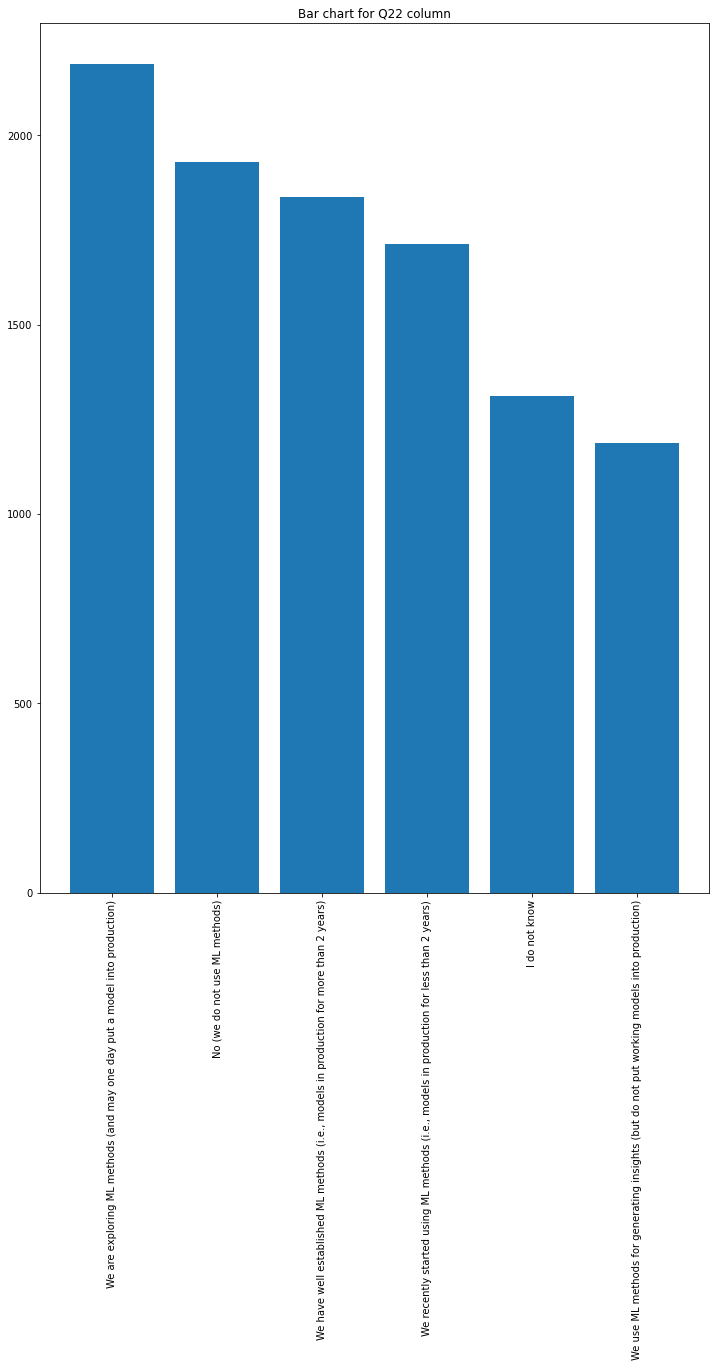

In [29]:
plt.figure(figsize=(12, 16))
# To-Do
plt.title("Bar chart for Q22 column")
plt.bar(Q22.value_counts().index, Q22.value_counts().values)
plt.xticks(rotation = 'vertical')
plt.show()

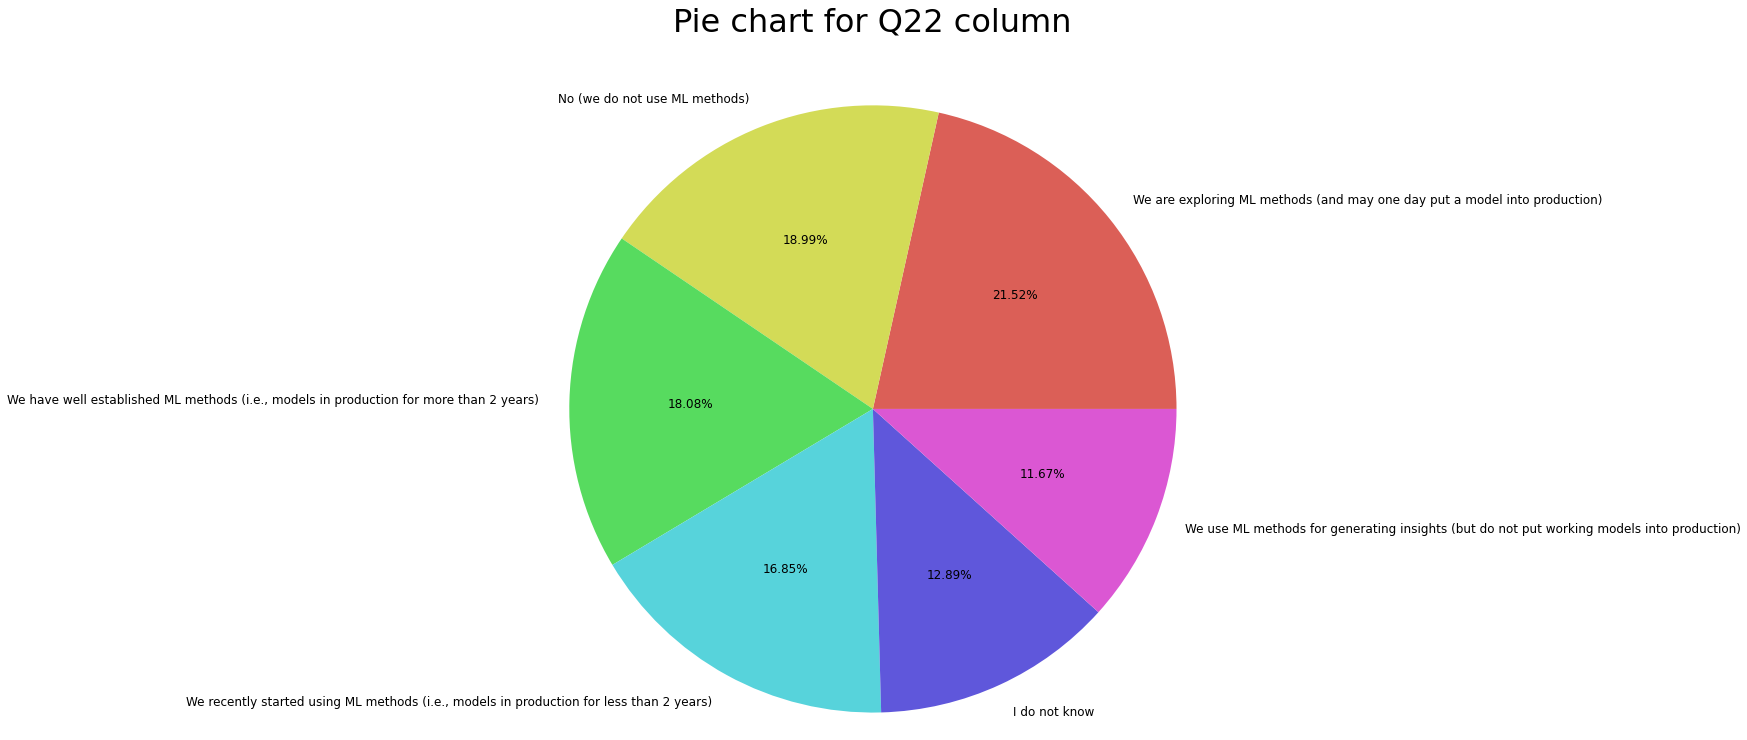

In [30]:
plt.figure(figsize=(12, 12))
plt.pie(Q22.value_counts(),
       labels=Q22.value_counts().index,
       autopct='%.2f%%',
        colors=sns.color_palette('hls',len(Q22.value_counts().index)),
       textprops={'fontsize':12})
plt.axis('equal')
plt.title("Pie chart for Q22 column", fontsize=32, pad=50)
plt.show()

In [31]:
# (OPTIONAL) 한국에 있는 사람들 자료 활용
## 한국이 뭐라고 표기되어 있는지 검색
set(data["Q3"]) # → South Korea 와 Republic of Korea 로 명시되어 있음.
skorea = data[data["Q3"].isin(["South Korea", "Republic of Korea"])]
skorea.head()

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER
39,592,25-29,Man,South Korea,Master’s degree,Currently not employed,5-10 years,Python,R,NaN,...,NaN,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN
234,1439,35-39,Man,Republic of Korea,Professional degree,Data Analyst,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
286,237,40-44,Man,South Korea,Bachelor’s degree,Currently not employed,1-2 years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
366,16200,25-29,Man,Republic of Korea,Master’s degree,Student,3-5 years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
371,668,35-39,Man,Republic of Korea,Master’s degree,Product/Project Manager,< 1 years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN


In [32]:
sQ4 = skorea["Q4"]
sQ4.value_counts()

Master’s degree                                                      82
Bachelor’s degree                                                    68
Doctoral degree                                                      40
Some college/university study without earning a bachelor’s degree    34
Professional degree                                                  10
No formal education past high school                                  8
I prefer not to answer                                                5
Name: Q4, dtype: int64

<AxesSubplot:xlabel='count', ylabel='Q4'>

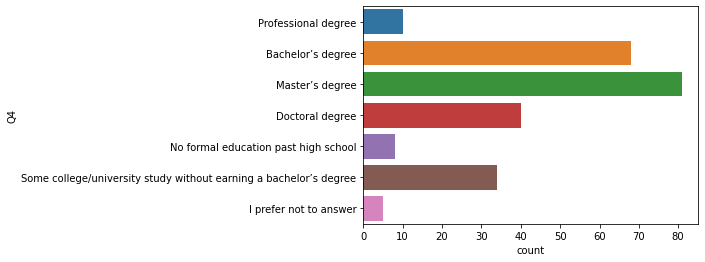

In [33]:
sns.countplot(y="Q4", data=skorea[1:])

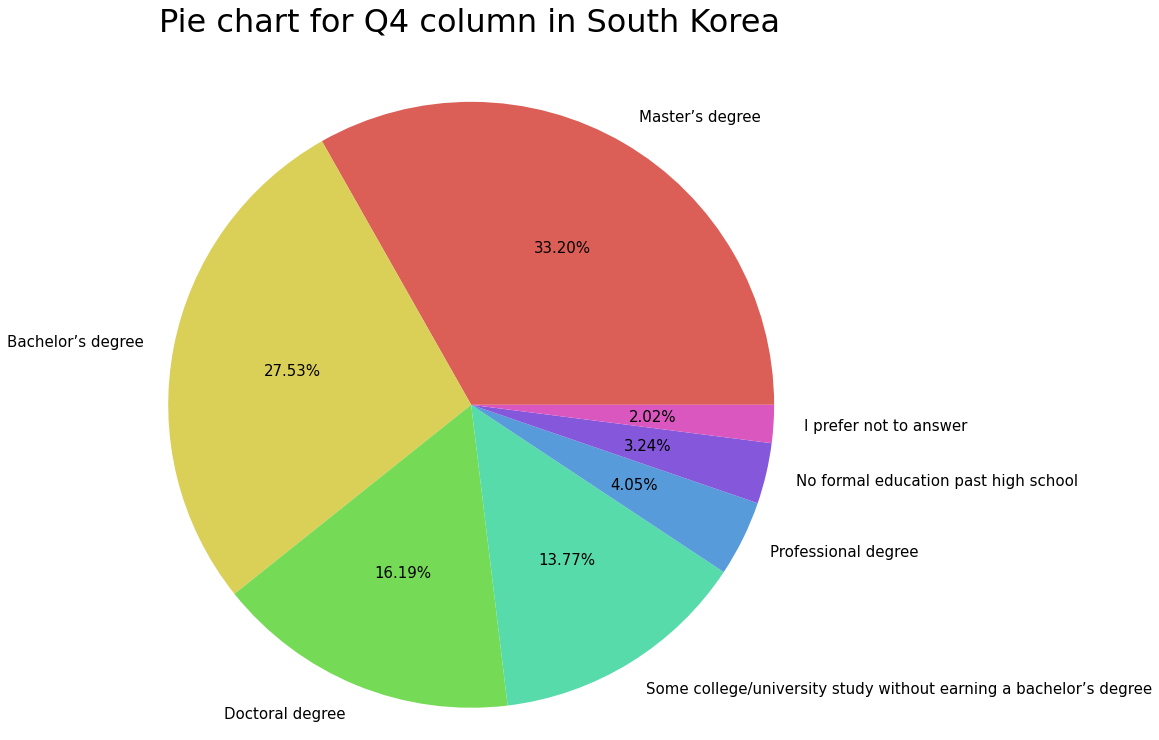

In [34]:
plt.figure(figsize=(12, 12))
plt.pie(sQ4.value_counts(),
       labels=sQ4.value_counts().index,
       autopct='%.2f%%',
        colors=sns.color_palette('hls',len(sQ4.value_counts().index)),
       textprops={'fontsize':15})
plt.axis('equal')
plt.title("Pie chart for Q4 column in South Korea", fontsize=32, pad=50)
plt.show()